<a href="https://colab.research.google.com/github/Pradeep3072/Prediction-of-icecream-sales-using-temperature/blob/main/Project%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Develop a model to predict icecream sales using temperature

In [2]:
!pip install tensorflow
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
sales_df = pd.read_csv('/content/SalesData.csv')

In [8]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [9]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [10]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [12]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


STEP #2: VISUALIZE DATASET

<Axes: xlabel='Temperature', ylabel='Revenue'>

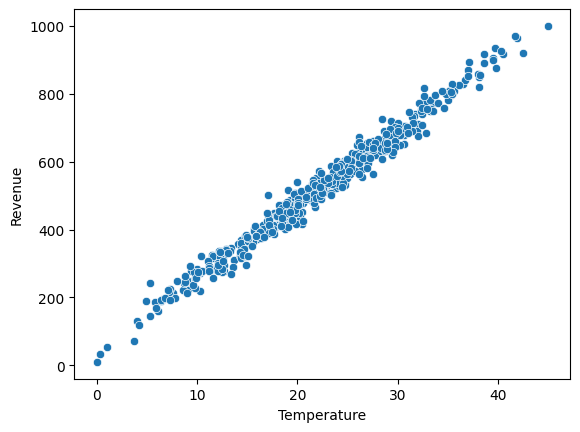

In [14]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue'])

STEP #3: CREATE TESTING AND TRAINING DATASET


In [15]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

STEP#4: BUILD AND TRAIN THE MODEL

In [16]:
X_train.shape

(500,)

In [17]:
y_train.shape

(500,)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [21]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 2s 4ms/step - loss: 269678.5938
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 230534.7969
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 196227.6562
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 165165.0469
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 138235.2031
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 114963.9375
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 94935.7734
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 77656.2109
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 63037.1992
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 50805.0312
Epoch 11/1000
16/16 [==============================] - 0s 3ms/step - loss: 40706.2422
Epoch 12/1000
16/16 [==============================] - 0s

# STEP#5: EVALUATE THE MODEL


In [22]:
epochs_hist.history.keys()

dict_keys(['loss'])

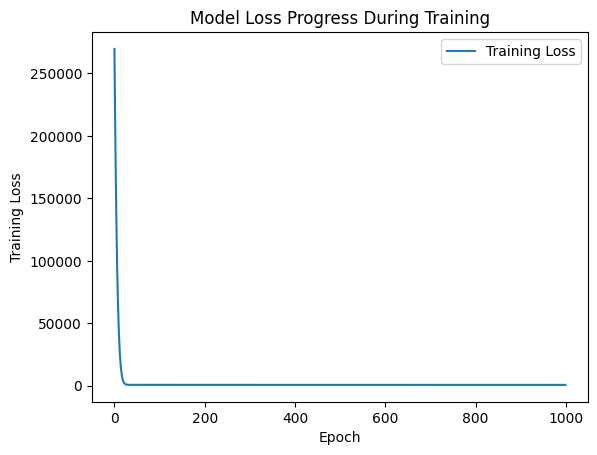

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [24]:
model.get_weights()

[array([[21.523672]], dtype=float32), array([44.994217], dtype=float32)]

In [25]:
Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)

1/1 [==============================] - 0s 96ms/step
Revenue Predictions Using Trained ANN = [[152.61258]]


16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

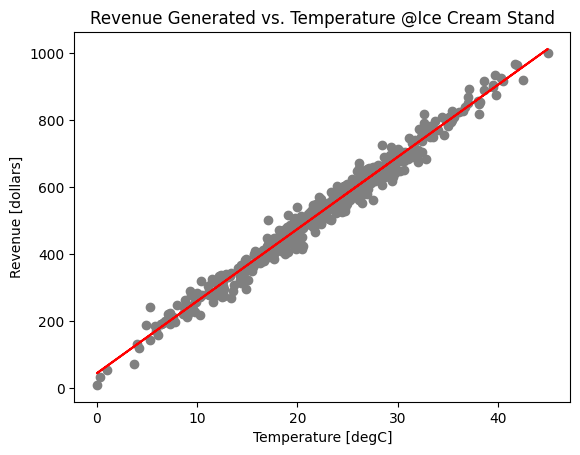

In [26]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')